# Frozen graph
Extract frozen graph from tar archive and saving as a summary


In [1]:
import tarfile
import os
import tensorflow as tf
import numpy as np

In [2]:
tarball_path = "D:\Library\Datasets\deeplab model\deeplabv3_pascal_trainval_2018_01_04.tar.gz"
graph_def = None
    # Extract frozen graph from tar archive.
tar_file = tarfile.open(tarball_path)

tf.reset_default_graph()

for tar_info in tar_file.getmembers():
    if 'frozen_inference_graph' in os.path.basename(tar_info.name):
        file_handle = tar_file.extractfile(tar_info)
        graph_def = tf.GraphDef.FromString(file_handle.read())
        break

In [3]:
tar_file.close()

In [4]:
tf.import_graph_def(graph_def, name='')

In [5]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("deeplabV3_original_graph", sess.graph)

    writer.close()

# Model Training

In [1]:
import data_importer
import model as md
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
inputs = tf.keras.Input(shape=(480,640,3))
model = md.deep_lab_v3(inputs=inputs)

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 480, 640, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 482, 642, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 240, 320, 32) 864         zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 240, 320, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReL

In [4]:
model.compile(optimizer=tf.train.RMSPropOptimizer(0.001),
              loss='categorical_crossentropy',#loss='categorical_crossentropy',
              metrics=['accuracy'])

## Imporing Dataset

In [ ]:
# import data_importer
# data = data_importer.SynthiaSf('D:/Library/Datasets/SYNTHIA-SF/',label_type='segmentation',shuffle=True)
# a = iter(data)

In [ ]:
# x=next(a)
# plt.imshow(x[1][0],cmap='nipy_spectral')

In [5]:
batch_size=1
NYU_Depth_Dataset_V2_address = "D:\\Library\\Datasets\\nyu depth v2\\nyu_depth_v2_labeled.mat"
def input_set():
    dataset = tf.data.Dataset.from_generator(data_importer.NYU, 
                                             (tf.float32, tf.float32), 
                                             (tf.TensorShape([batch_size,480, 640, 3]), 
                                              tf.TensorShape([batch_size,480, 640])),
                                            (NYU_Depth_Dataset_V2_address,batch_size,True))
    return dataset

In [6]:
nyu = data_importer.NYU(NYU_Depth_Dataset_V2_address,batch_size=batch_size, repeater=True,label_type='segmentation')

In [4]:
n = iter(nyu)

In [5]:
a,b=next(n)
# type(b)

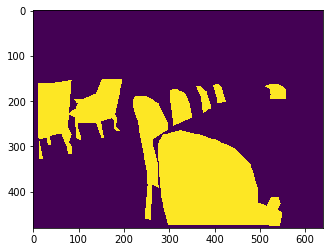

In [6]:
plt.imshow(b[0, :, :, 5])

In [ ]:
# estimator.train(
#       input_fn=input_set,
#       steps=3000)

In [7]:
# model.fit_generator(nyu,steps_per_epoch=1448)

callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./log', write_images=True)
]
model.fit_generator(nyu, steps_per_epoch=1448, epochs=1, callbacks=callbacks)

Epoch 1/1
  65/1448 [>.............................] - ETA: 49:57 - loss: 4.8195 - acc: 0.1305

KeyboardInterrupt: 

In [9]:
n = iter(nyu)

In [10]:
a,b=next(n)

In [11]:
model.evaluate(a,b)

1/1 [==============================] - 2s 2s/step


[2.935218645916393e-08, 0.9010416865348816]

In [12]:
c=model.predict(a,steps=1)

D:\Programs\anaconda3\envs\tf\lib\site-packages\matplotlib\image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
D:\Programs\anaconda3\envs\tf\lib\site-packages\matplotlib\image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
D:\Programs\anaconda3\envs\tf\lib\site-packages\matplotlib\image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
D:\Programs\anaconda3\envs\tf\lib\site-packages\matplotlib\image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
D:\Programs\anaconda3\envs\tf\lib\site-packages\matplotlib\colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
D:\Programs\anaconda3\envs\tf\lib\site-packages\numpy\ma\core.py:718: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


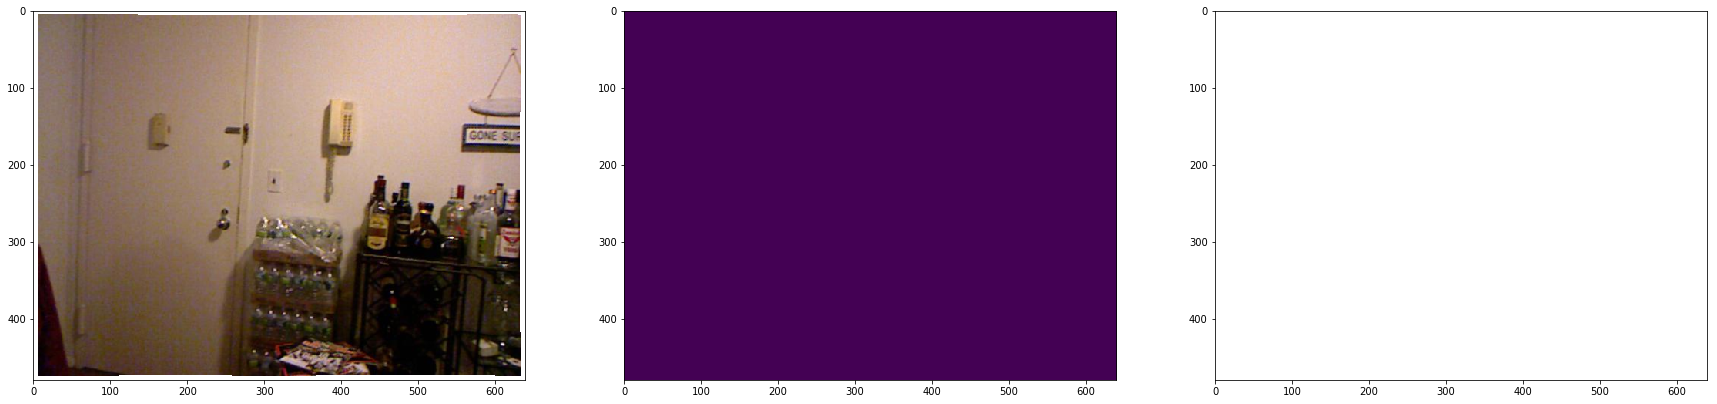

In [13]:
i=5
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(a[0,:,:])
plt.subplot(1,3,2)
plt.imshow(b[0,:,:,i])
plt.subplot(1,3,3)
plt.imshow(c[0,:,:,i])

In [8]:
import tensorflow as tf
inp = tf.constant([[4],[4],[3]])

In [2]:
sess = tf.Session()

In [3]:
x=sess.run(inp)

In [20]:
type(inp.get_shape()[0])

tensorflow.python.framework.tensor_shape.Dimension

In [14]:
bc

array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan